# Useful pre-processing codes before image labeling

### Resizing all pictures in a folder

In the example below, all images in the folder will be resized to 640x480.

In [ ]:
import os
from PIL import Image

f = r'./folder_name'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((640,480))
    img.save(f_img)

### Convert video to images

In [ ]:
import cv2, os, re, sys

# Save every n_th frame of a video as a JPEG
def save_frames_as_jpeg(video_name, video_path, frame_step = 1):
    capture = cv2.VideoCapture(video_path)
    file_name = re.sub(r'\..*', '', video_path)  # Get rid of extension
    file_name = re.sub(r'(.*\/)*', '', file_name)  # Get rid of directories

    try:
        os.makedirs(f'images/{file_name}')
    except FileExistsError:
        pass
    total_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(total_frames)
    
    # Iterate through frames and save each 'frame_step'^th frame
    frame = 0
    framename= 0
    frame_step=5
    success, image = capture.read()
    while success:
        success, image = capture.read()
        if frame % frame_step ==0:
            cv2.imwrite(f"images/{file_name}/{framename}.jpg", image)  # save frame as JPG file
            framename=framename+1
            show_progress(frame, total_frames, status=f'frame {frame}/{total_frames} from {video_path}')
        frame += 1

# Display progress bar
def show_progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))
    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)
    sys.stdout.write(f'[{bar}] {percents}% --- {status}\r')
    sys.stdout.flush()

if __name__ == "__main__":
    try:
        step = int(sys.argv[1])
    except IndexError:
        print('No frame_step argument given. Setting frame_step to 1')
        step = 1
    except ValueError:
        print('Invalid argument given. Expecting frame_step argument of type integer. Quitting...')
        exit()

    for root, dirs, files in os.walk("videos"):
        for name in files:
            if name is '.DS_Store':
                continue
            path = os.path.join(root, name)
            save_frames_as_jpeg(name, path, step)
            print()

### Cropping process

Cropping is done according to the given values.

cropped = image[y1:y2, x1:x2]

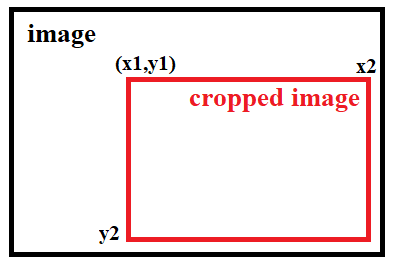

In [ ]:
import cv2
import glob

def process(filename, key):
    # Read image
    image = cv2.imread(filename)

    cropped = image[45:480, 0:640]
    cv2.imwrite('Images/cropped_{}.jpg'.format(key), cropped)

# Grab all images in a given directory
for (i, image_file) in enumerate(sorted(glob.glob('folder_name/*.jpg'))):
    process(image_file, i)

# Message
print ('Done!')

### Rename file names

The code below renames all files in a folder.

In [ ]:
import os
filePath = "./folder_name/"
for fileName in os.listdir(filePath):
        os.rename(filePath + "/" +fileName,filePath + "/a_" +fileName)

### Changing the values in the .txt file

Sometimes we want to change the value in a file such as a text box or Json file. For example, if you want to change the class from 0 to 1 in Yolo-Darknet format, the following code will be useful.

In [ ]:
for i in range(n): # n: Number of files in the folder
    try:
        filename=rf'./frame_{i}'
        reading_file = open('{}.txt'.format(filename), "r")

        new_file_content = ""
        for line in reading_file:
            stripped_line = line.strip()
            new_line = stripped_line.replace("1 ", "0 ")
            new_file_content += new_line +"\n"
        reading_file.close()

        writing_file = open(rf'./frame_{i}.txt', "w")
        writing_file.write(new_file_content)
        writing_file.close()
    except:
        pass